# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image

# Folium

In [3]:
import folium

In [4]:
# center of map
center = [38.879597, -77.069487]

In [5]:
# coordinates to plot
coords = [
    [38.888740, -77.092926],
    [38.899136, -77.039073],
    [38.887982, -77.026465]
]

In [6]:
# folium map object
map = folium.Map(location=center, zoom_start=13)
# add each coordinate
for point in range(0, len(coords)):
    folium.Marker(coords[point]).add_to(map)
map

# Google Maps

In [7]:
import gmplot
import os
from dotenv import load_dotenv

In [8]:
# load api key
load_dotenv()
api_key = os.getenv('API_KEY')

In [9]:
# center of map
center = [38.879597, -77.069487]

In [10]:
# latitudes
lats = [38.888740, 38.899136, 38.887982]
# longitudes
longs = [-77.092926, -77.039073, -77.026465]

In [11]:
# gmap map object
gmap = gmplot.GoogleMapPlotter(center[0], center[1], 13, api_key=api_key)
# add coordinates
gmap.scatter(lats, longs)
# export map to html file
gmap.draw('data/gis/gmap.html')

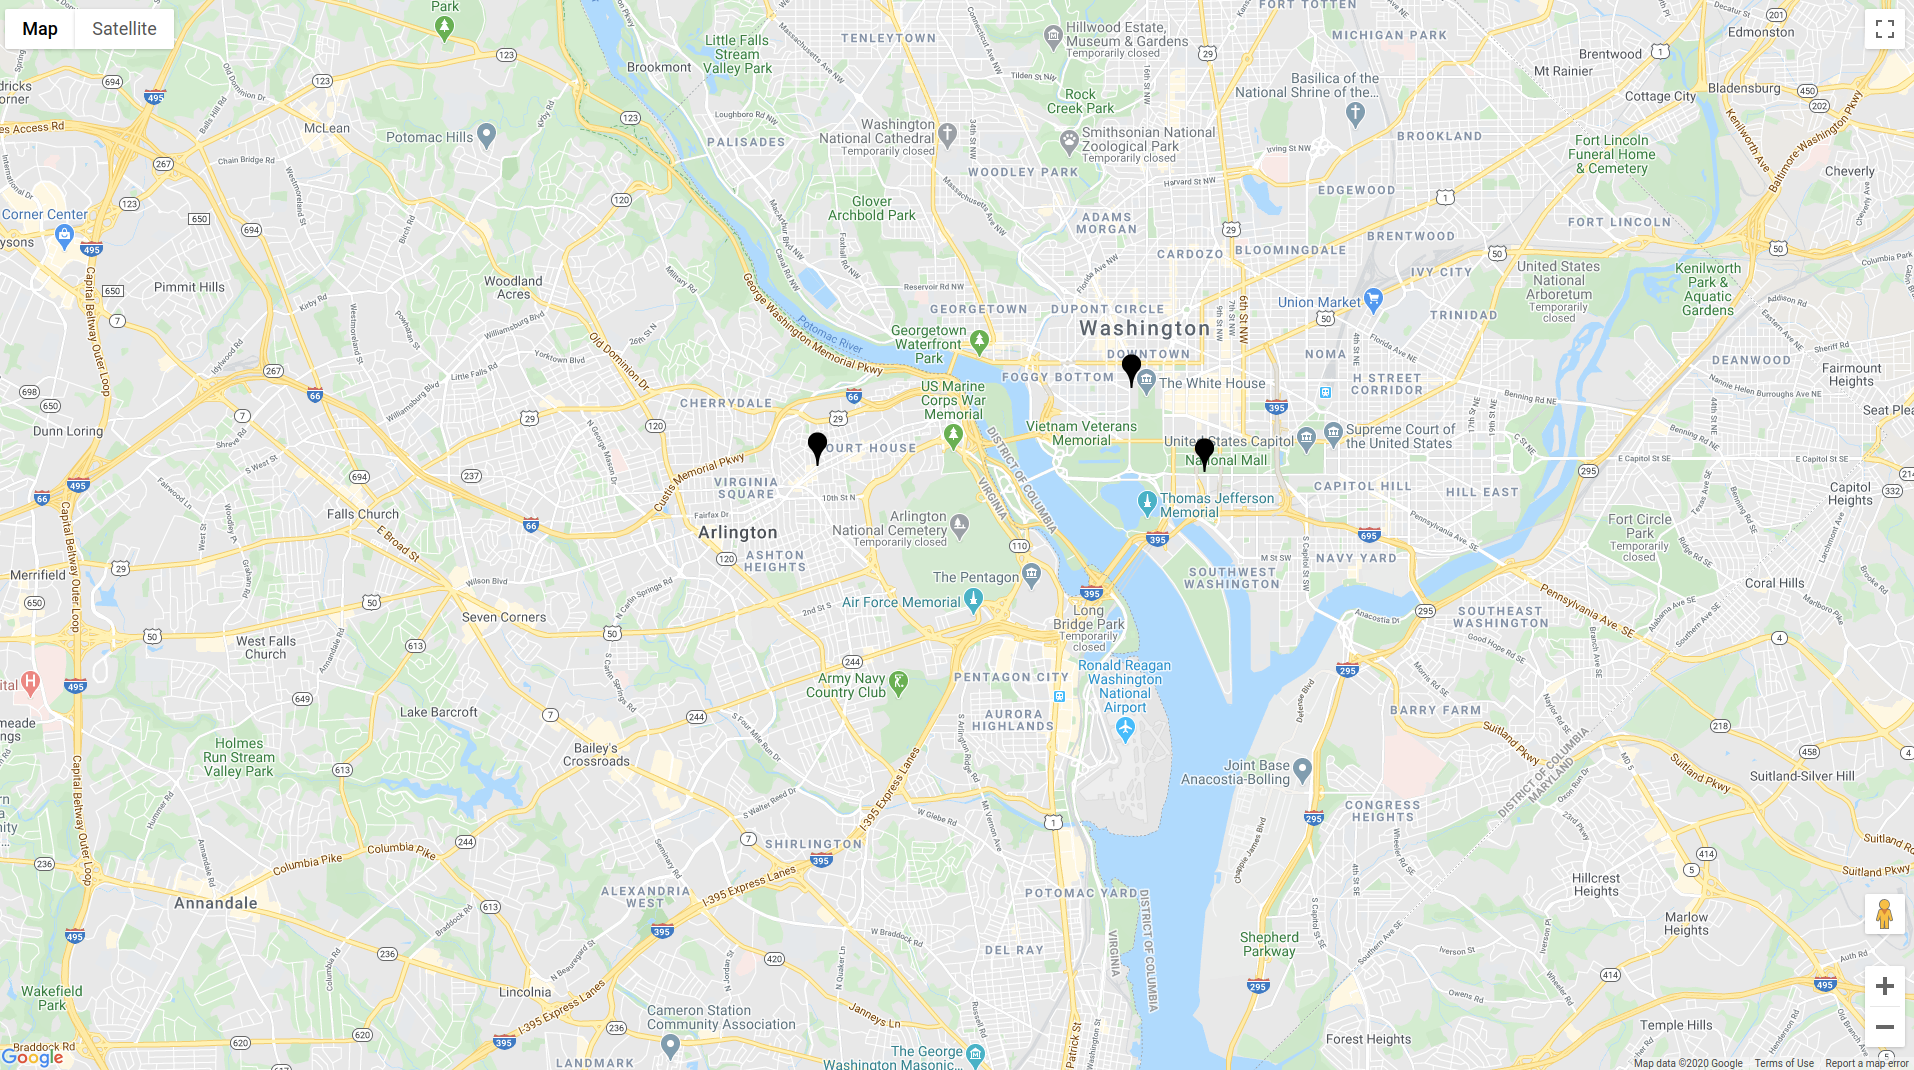

In [12]:
# html file loads view in google maps with browser
# screenshot:
Image(filename='data/gis/gmap.png')

# Geopandas

In [13]:
import geopandas as gpd

## States

In [14]:
# read in shapefile for state boundaries
usa_states = gpd.read_file('data/gis/states_21basic/states.shp')
usa_states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


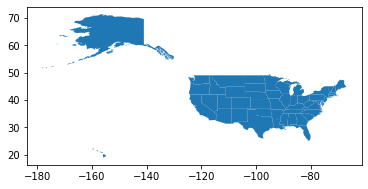

In [15]:
# plot shapefile
usa_states.plot();

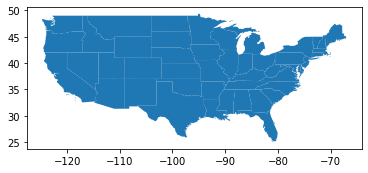

In [16]:
# plot continental states only
usa_states[1:50].plot();

### Choropleth Map

In [17]:
# generate random data on 1-10 scale for each state
np.random.seed(0)
data = np.random.randint(1, 11, size=len(usa_states))
data_df = pd.DataFrame({'state_id': usa_states['STATE_FIPS'], 'data': data})
data_df.head()

,state_id,data
0,15,6
1,53,1
2,30,4
3,23,4
4,38,8


In [18]:
# join data onto geopandas dataframe
states_df = usa_states.set_index('STATE_FIPS').join(data_df.set_index('state_id'))
states_df.head()

,STATE_NAME,DRAWSEQ,SUB_REGION,STATE_ABBR,geometry,data
STATE_FIPS,,,,,,
15,Hawaii,1,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",6
53,Washington,2,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1
30,Montana,3,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",4
23,Maine,4,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",4
38,North Dakota,5,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",8


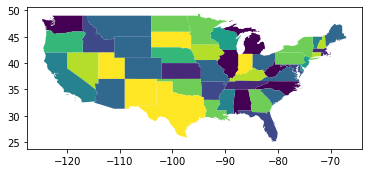

In [19]:
# create choropleth plot
states_df[1:50].plot(column='data');

## County

In [20]:
# read in shapefile for county boundaries
usa_counties = gpd.read_file('data/gis/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
usa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [21]:
# filter out territories, Alaska and Hawaii
excl_list = ['02', '15', '60', '66', '69', '72', '78']
usa_counties = usa_counties[~usa_counties['STATEFP'].isin(excl_list)].copy()

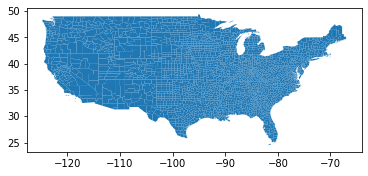

In [22]:
# plot shapefile
usa_counties.plot();

### Choropleth Map

In [23]:
# generate random data on 1-10 scale for each county
np.random.seed(0)
data = np.random.randint(1, 11, size=len(usa_counties))
data_df = pd.DataFrame({'county_id': usa_counties['GEOID'], 'data': data})
data_df.head()

,county_id,data
0,21007,6
1,21017,1
2,21031,4
3,21065,4
4,21069,8


In [24]:
# join data onto geopandas dataframe
counties_df = usa_counties.set_index('GEOID').join(data_df.set_index('county_id'))
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,data
GEOID,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",6
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",1
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",4
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",4
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",8


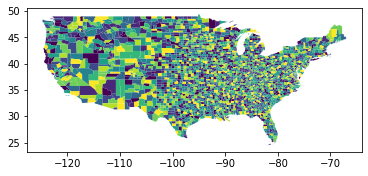

In [25]:
# create choropleth plot
counties_df.plot(column='data');

## City

In [26]:
# read in shapefile for boundaries within city
dc_hoods = gpd.read_file('data/gis/Neighborhood_Clusters')
dc_hoods.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,Shape_Leng,Shape_Area,TYPE,geometry
0,1,http://planning.dc.gov/,Cluster 39,"Congress Heights, Bellevue, Washington Highlands",10711.668010,4.886463e+06,Original,"POLYGON ((-76.99402 38.84520, -76.99351 38.844..."
1,2,http://planning.dc.gov/,Cluster 38,"Douglas, Shipley Terrace",8229.486324,2.367958e+06,Original,"POLYGON ((-76.97472 38.85287, -76.97421 38.852..."
2,3,http://planning.dc.gov/,Cluster 36,"Woodland/Fort Stanton, Garfield Heights, Knox ...",4746.344457,1.119573e+06,Original,"POLYGON ((-76.96877 38.86067, -76.96861 38.860..."
3,4,http://planning.dc.gov/,Cluster 27,"Near Southeast, Navy Yard",7286.968902,1.619167e+06,Original,"POLYGON ((-76.98726 38.87712, -76.98569 38.877..."
4,5,http://planning.dc.gov/,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park",11251.012821,4.286254e+06,Original,"POLYGON ((-76.93760 38.88996, -76.93753 38.889..."


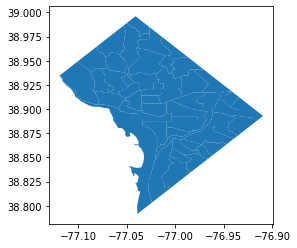

In [27]:
# plot shapefile
dc_hoods.plot();

### Choropleth Map

In [28]:
# generate random data on 1-10 scale for each neighborhood and add to dataframe
np.random.seed(0)
data = np.random.randint(1, 11, size=len(dc_hoods))
data_df = pd.DataFrame({'hood_id': dc_hoods['OBJECTID'], 'data': data})
data_df.head()

,hood_id,data
0,1,6
1,2,1
2,3,4
3,4,4
4,5,8


In [29]:
# join data onto geopandas dataframe
hoods_df = dc_hoods.set_index('OBJECTID').join(data_df.set_index('hood_id'))
hoods_df.head()

,WEB_URL,NAME,NBH_NAMES,Shape_Leng,Shape_Area,TYPE,geometry,data
OBJECTID,,,,,,,,
1,http://planning.dc.gov/,Cluster 39,"Congress Heights, Bellevue, Washington Highlands",10711.668010,4.886463e+06,Original,"POLYGON ((-76.99402 38.84520, -76.99351 38.844...",6
2,http://planning.dc.gov/,Cluster 38,"Douglas, Shipley Terrace",8229.486324,2.367958e+06,Original,"POLYGON ((-76.97472 38.85287, -76.97421 38.852...",1
3,http://planning.dc.gov/,Cluster 36,"Woodland/Fort Stanton, Garfield Heights, Knox ...",4746.344457,1.119573e+06,Original,"POLYGON ((-76.96877 38.86067, -76.96861 38.860...",4
4,http://planning.dc.gov/,Cluster 27,"Near Southeast, Navy Yard",7286.968902,1.619167e+06,Original,"POLYGON ((-76.98726 38.87712, -76.98569 38.877...",4
5,http://planning.dc.gov/,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park",11251.012821,4.286254e+06,Original,"POLYGON ((-76.93760 38.88996, -76.93753 38.889...",8


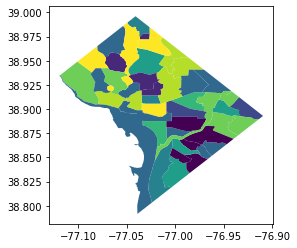

In [30]:
# create plot
hoods_df.plot(column='data');

### Formatted Choropleth

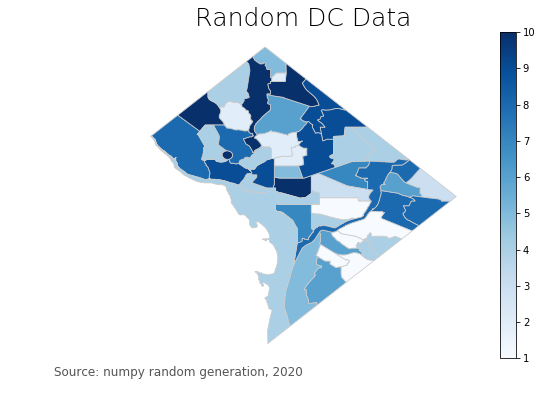

In [31]:
# data name in dataframe
variable = 'data'
# set the range for the choropleth
vmin, vmax = 1, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
hoods_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')
# add a title
ax.set_title('Random DC Data', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate(
    'Source: numpy random generation, 2020',
    xy=(0.1, .08),  
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=12, 
    color='#555555'
)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)